<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/Use_Single_Qubit_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install imgaug==0.2.5
!pip install pylatexenc

References: https://www.youtube.com/watch?v=IvhqbvsSrjU
            https://youtu.be/w951uiUBntw

In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

[default]
circuit_drawer = mpl


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

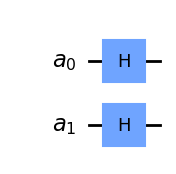

In [ ]:
qra = QuantumRegister(2, "a")
qrb = QuantumRegister(3, "b")

qc1 = QuantumCircuit(qra)
qc1.h(qra)
qc1.draw()

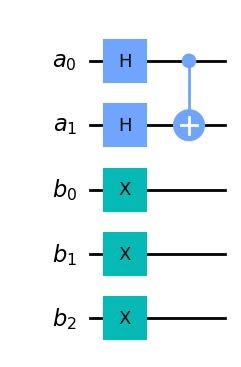

In [ ]:
qc2 = QuantumCircuit(qra)
qc2.add_register(qrb)   #including more register after creating the circuit
qc2.h(qra)              #applying all operation to all qubits in the register
qc2.cx(qra[0], qra[1])  #Using inndexes
qc2.x(qrb)
qc2.draw("mpl")

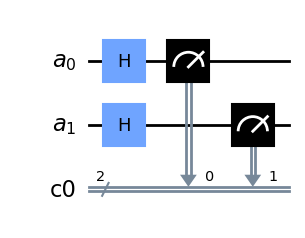

In [ ]:
cr = ClassicalRegister(2)

qc3 = QuantumCircuit(qra, cr)
qc3.h(qra)
qc3.measure(qra, cr)
qc3.draw("mpl")

### Measuring midway through quantum circuit

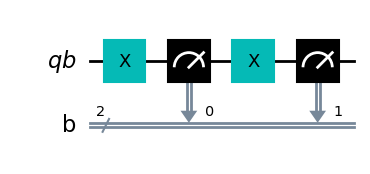

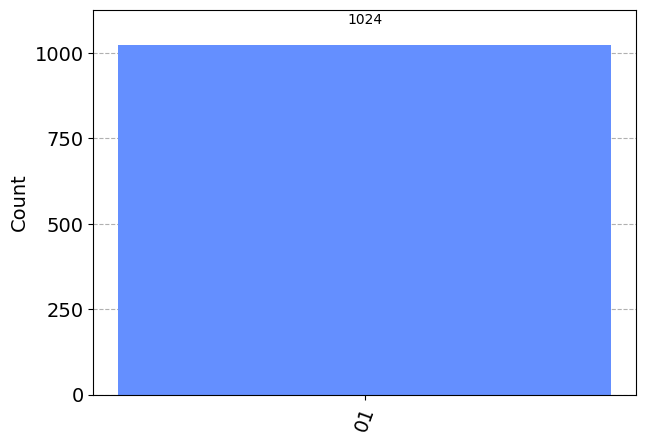

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, "qb")
cr = ClassicalRegister(2, "b")

qc = QuantumCircuit(qr, cr)
qc.x(qr)
qc.measure(qr, cr[0]) #first measure
qc.x(qr)
qc.measure(qr, cr[1]) #second measure on same qubitb
display(qc.draw("mpl"))

from qiskit.providers.aer import QasmSimulator
sim = QasmSimulator()
job = sim.run(qc)
result = job.result()
counts = result.get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

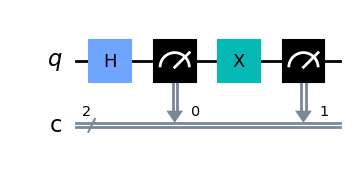

In [ ]:
#Measuring a superposition colapses it
from qiskit import QuantumCircuit

qc=QuantumCircuit(1,2)
qc.h(0)
qc.measure(0,0)
qc.x(0)
qc.measure(0,1)
qc.draw()


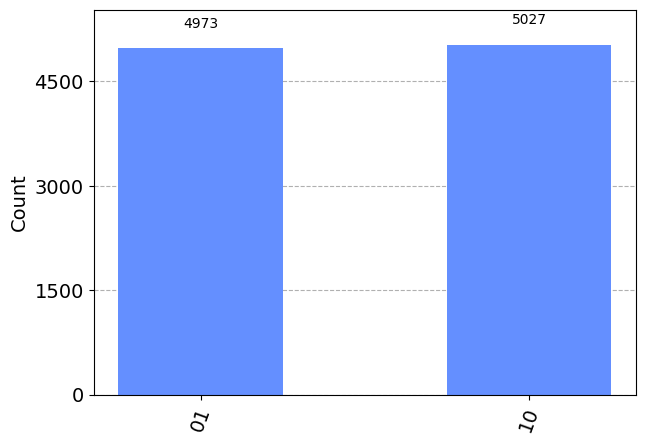

In [ ]:
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

sim = QasmSimulator()

job = sim.run(qc, shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)